In [1]:
%load_ext autoreload
%autoreload 2

from pyatmosphere import gpu

gpu.config['use_gpu'] = True

# QuickChannel example

In [2]:
from pyatmosphere import QuickChannel


quick_channel = QuickChannel(
    Cn2=1e-15, 
    length=10000,
    count_ps=5,
    beam_w0=0.09,
    beam_wvl=8.08e-07,
    aperture_radius=0.12,
    )

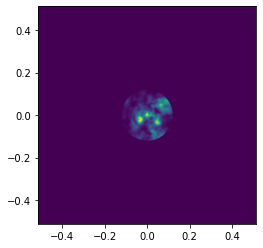

In [4]:
quick_channel.plot()

# Advanced channel example

In [5]:
import numpy as np
from matplotlib import pyplot as plt

from pyatmosphere import (
    Channel, 
    RectGrid, 
    RandLogPolarGrid,
    GaussianSource,
    IdenticalPhaseScreensPath,
    SSPhaseScreen,
    CirclePupil,
    MVKModel,
    measures,
    )

In [6]:
channel = Channel(
    grid=RectGrid(
        resolution=2048, 
        delta=0.0015
    ),
    source=GaussianSource(
        wvl=808e-9,
        w0=0.12,
        F0=np.inf
    ),
    path=IdenticalPhaseScreensPath(
        phase_screen=SSPhaseScreen(
            model=MVKModel(
                Cn2=5e-16,
                l0=6e-3,
                L0=1e3,
            ),
            f_grid=RandLogPolarGrid(
                points=2**10, 
                f_min=1 / 1e3 / 15, 
                f_max=1 / 6e-3 * 2
            )
        ),
        length=50e3,
        count=5
    ),
    pupil=CirclePupil(
        radius=0.2
    ),
)

Sigma_R^2 = 27.7
Beam mean_x = 0.385 m


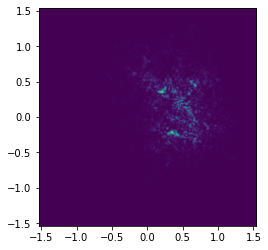

In [14]:
channel_output = channel.run(pupil=False)
intensity = measures.I(channel, output=channel_output)
mean_x = measures.mean_x(channel, output=channel_output)

print(f"Sigma_R^2 = {channel.get_rythov2():.1f}")
print(f"Beam mean_x = {mean_x:.3f} m")
plt.imshow(gpu.get_array(intensity), extent=channel.grid.extent)
plt.show()

# Example of simulations

In [15]:
from pyatmosphere import simulations

beam_result = simulations.BeamResult(quick_channel, max_size=2000)
pdt_result = simulations.PDTResult(quick_channel, max_size=6000)

sim = simulations.Simulation([beam_result, pdt_result])

sigma_BW_x = 3.9e-02 +- 6.2e-04
sigma_LT_x = 1.8e-01 +- 6.8e-04
W_ST = 1.6e-01 +- 4.3e-04
Count of measures: 2000


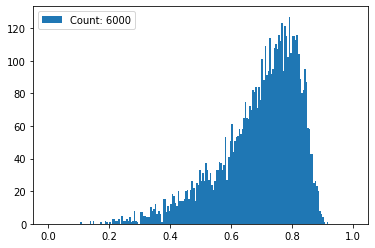

In [16]:
sim.run(plot_step=1000)